In [148]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Scikit-learn model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For hyperparameter optimization
from sklearn.model_selection import GridSearchCV

In [129]:
df = pd.read_csv(r"C:\Users\SAI RAJU\OneDrive\Desktop\praveen\ML\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [130]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [131]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [132]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

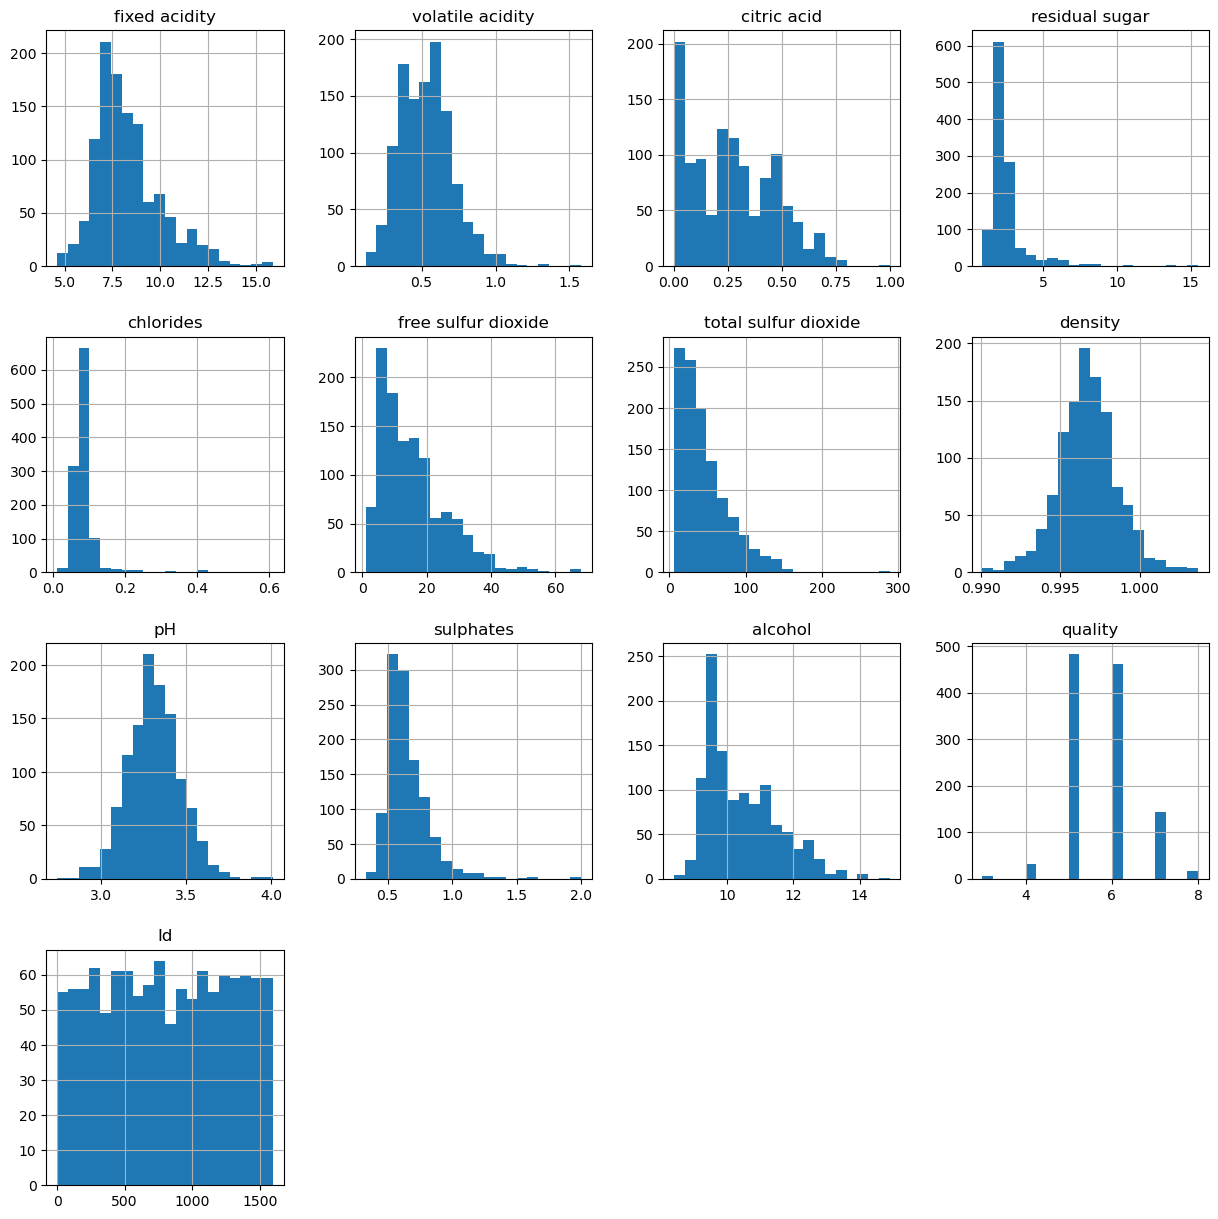

In [133]:
#data visualisation 
df.hist(bins=20,figsize=(15,15))
plt.title('Histogram of the data')
plt.show()

In [134]:
'''def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]'''

'def split_train_test(data, test_ratio):\n    shuffled_indices = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled_indices[:test_set_size]\n    train_indices = shuffled_indices[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]'

In [135]:
'''train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))
print(len(test_set))'''

'train_set, test_set = split_train_test(df, 0.2)\nprint(len(train_set))\nprint(len(test_set))'

In [136]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

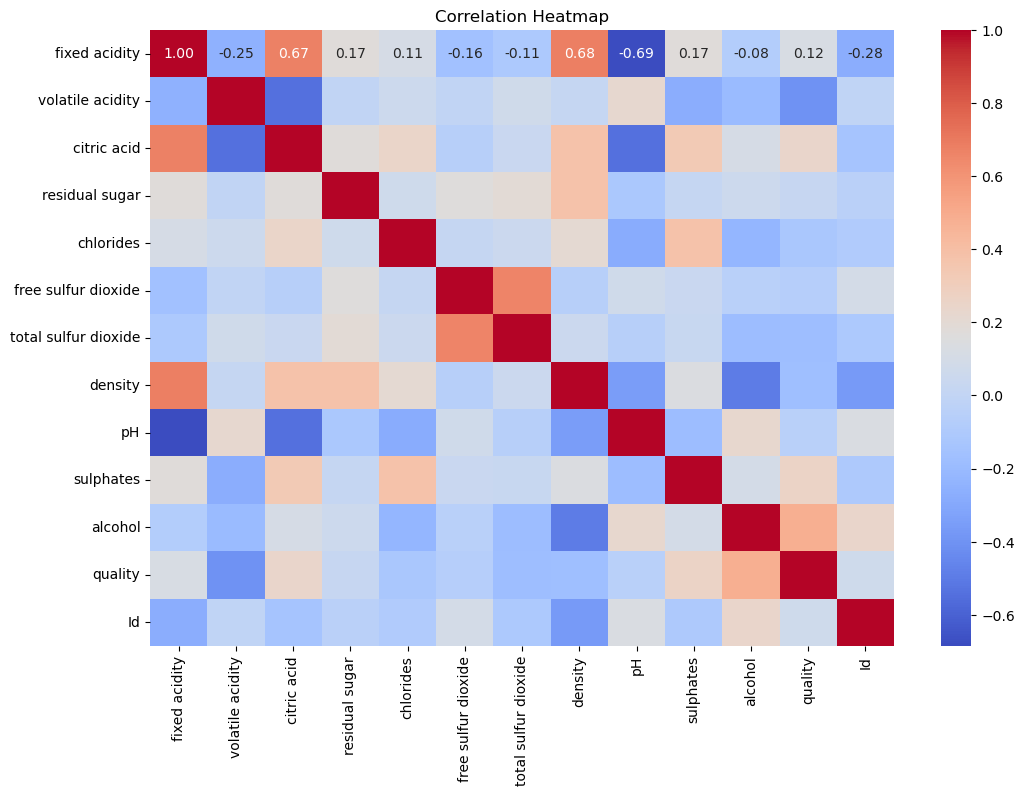

In [137]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

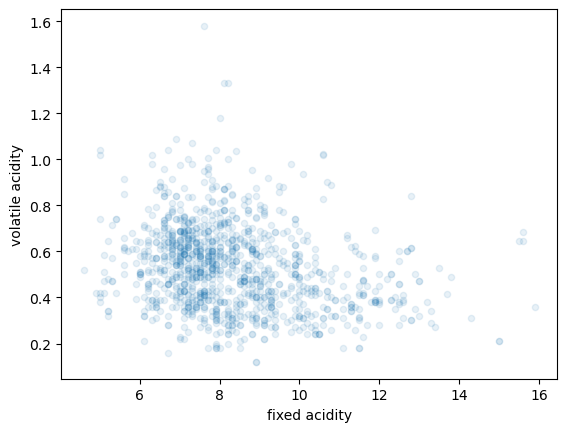

In [138]:
df.plot(kind="scatter", x="fixed acidity", y="volatile acidity", alpha=0.1)

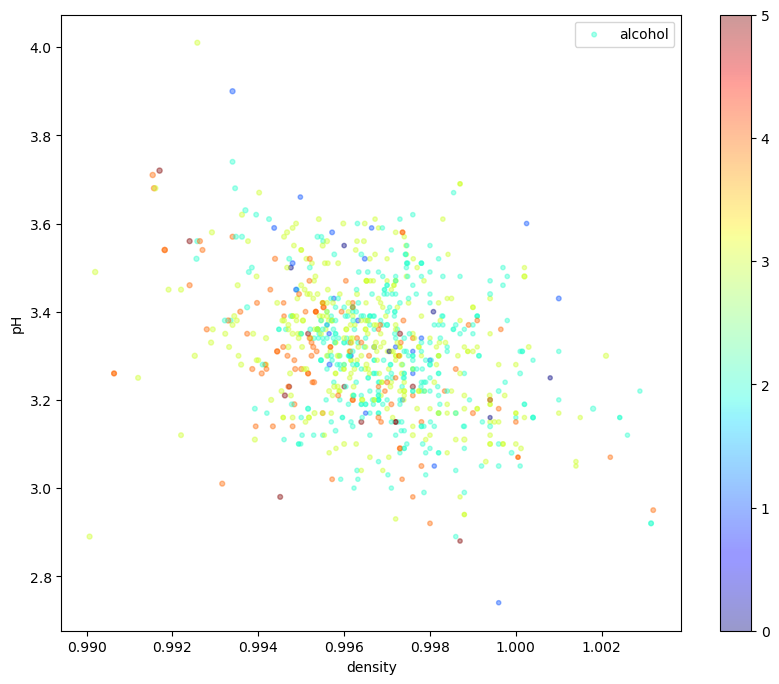

In [139]:
quality_encoded = train_set['quality'].astype('category').cat.codes
train_set.plot(kind='scatter', x="density", y="pH",alpha= 0.4,
               s= train_set['alcohol'], label='alcohol',figsize=(10,8),
               c=quality_encoded,cmap=plt.get_cmap('jet'),colorbar='True',sharex=False)
plt.legend()

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='fixed acidity', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
        <Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='fixed acidity', ylabel='sulphates'>],
       [<Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='fixed acidity', ylabel='citric acid'>],
       [<Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='fixed acidity', ylabel='fixed acidity'>]],
      dtype=object)

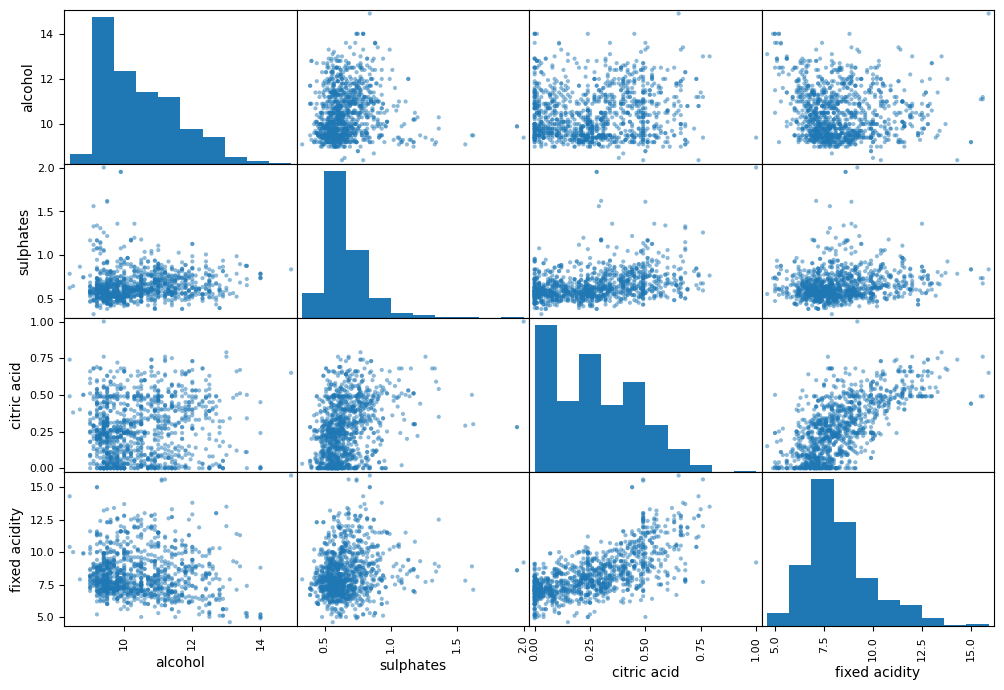

In [140]:
from pandas.plotting import scatter_matrix

attributes = ["alcohol", "sulphates", "citric acid",
              "fixed acidity"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [141]:
#preparing data for modeling
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [142]:
'''#rando forest without scaling
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')'''

Accuracy: 0.69


In [150]:
#random forest with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


In [144]:
#linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

y_pred_rounded = y_pred.round()

# Calculate accuracy by comparing the rounded predictions to the actual values
accuracy = accuracy_score(y_test, y_pred_rounded)
print(f'Accuracy: {accuracy:.2f}')

Mean Squared Error: 0.38
R² Score: 0.32
Accuracy: 0.64


In [145]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert continuous predictions to discrete values by rounding
y_pred_rounded = y_pred.round()

# Calculate accuracy by comparing the rounded predictions to the actual values
accuracy = accuracy_score(y_test, y_pred_rounded)

# Print the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Mean Squared Error: 0.33
R² Score: 0.41
Accuracy: 0.62


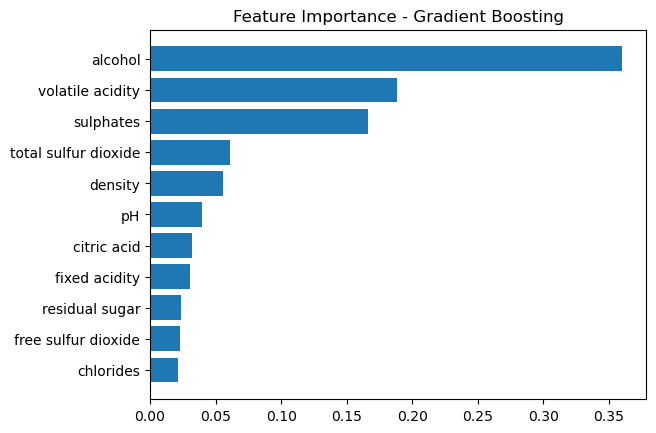

In [146]:
# Feature Importance for Gradient Boosting
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance - Gradient Boosting")
plt.show()

In [153]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')
loaded_random_forest_model = joblib.load('random_forest_model.pkl')